# Algoritmos de ordenamiento

In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from functools import wraps

## Definición función `merge_sort`

In [221]:
def merge(left: np.array, right: np.array) -> np.array:
    res = list()
    while len(left) > 0 and len(right) > 0:
        if left[0] <= right[0]:
            res = np.append(res, left[0])
            left = np.delete(left, 0)
        else:
            res = np.append(res, right[0])
            right = np.delete(right, 0)
    if len(left) == 0:
        return np.append(res, right)
    else:
        return np.append(res, left)


def merge_sort(arr: np.array) -> np.array:
    size = len(arr)
    if size < 2:
        return arr
    left, right =  arr[:size // 2], arr[size // 2:]
    left = merge_sort(left)
    right = merge_sort(right)
    return merge(left, right)


## Definición función `quick_sort`

In [222]:
def partition(arr: np.array, low: int, high: int) -> int:
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            (arr[i], arr[j]) = (arr[j], arr[i])
    (arr[i + 1], arr[high]) = (arr[high], arr[i + 1])
    return i + 1

def quick_sort(arr: np.array, low: int, high: int):
    if low < high:
        p = partition(arr, low, high)
        quick_sort(arr, low, p - 1)
        quick_sort(arr, p + 1, high)

## Medir los tiempos de los distintos algoritmos

In [224]:
LIMIT = 100
ms_times = list()
qs_times = list()
np_times = list()

for i in range(1, LIMIT):
    array = np.random.randint(1, 100, i)

    start = time.time()
    np.sort(array)
    np_times.append(time.time() - start)

    start = time.time()
    merge_sort(array)
    ms_times.append(time.time() - start)

    start = time.time()
    quick_sort(array, 0, len(array) - 1)
    qs_times.append(time.time() - start)

Guardar los tiempos en un data frame 

In [225]:
times_df = pd.DataFrame({
    'merge': ms_times,
    'quick': qs_times,
    'numpy': np_times 
})
times_df.head()

,merge,quick,numpy
0,0.000007,0.000005,0.000026
1,0.000168,0.000016,0.000096
2,0.000431,0.000021,0.000014
3,0.000322,0.000020,0.000015
4,0.000554,0.000027,0.000015


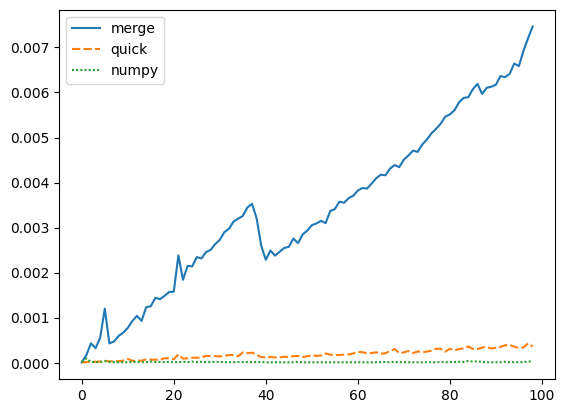

In [226]:
sns.lineplot(
    data= times_df
)
!clear